<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузим-необходимые-библиотеки,-датасет.-Посмотрим-общую-информацию-по-датасету" data-toc-modified-id="Загрузим-необходимые-библиотеки,-датасет.-Посмотрим-общую-информацию-по-датасету-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим необходимые библиотеки, датасет. Посмотрим общую информацию по датасету</a></span></li><li><span><a href="#Посмотрим-на-распределение-классов-в-данных" data-toc-modified-id="Посмотрим-на-распределение-классов-в-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Посмотрим на распределение классов в данных</a></span></li><li><span><a href="#Подготовим-текст" data-toc-modified-id="Подготовим-текст-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовим текст</a></span></li><li><span><a href="#Проведём-частотный-анализ-текста" data-toc-modified-id="Проведём-частотный-анализ-текста-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведём частотный анализ текста</a></span></li><li><span><a href="#Проведём-частотный-анализ-облака-слов" data-toc-modified-id="Проведём-частотный-анализ-облака-слов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проведём частотный анализ облака слов</a></span></li><li><span><a href="#Разделим-на-выборки" data-toc-modified-id="Разделим-на-выборки-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Разделим на выборки</a></span></li><li><span><a href="#Уберём-ненужные-слова-из-текста" data-toc-modified-id="Уберём-ненужные-слова-из-текста-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Уберём ненужные слова из текста</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#Создадим-таблицу-результатов" data-toc-modified-id="Создадим-таблицу-результатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Создадим таблицу результатов</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузим необходимые библиотеки, датасет. Посмотрим общую информацию по датасету

In [1]:
pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import spacy
import random
from tqdm.notebook import tqdm
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import ydata_profiling
from wordcloud import WordCloud

In [4]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv', index_col=0)   
except:
    data = pd.read_csv('https://code.s3.yandex.net/toxic_comments.csv', index_col=0)

In [5]:
data.sample(10)

,text,toxic
61131,"Also see the section called History, some sect...",0
19896,"""\n\n 2008 Harvey Host\nAdded link, hopefully ...",0
110273,"""\n\nSkomorokh, if what you say is the case th...",0
140954,Kiernan knows this so feels he can get away wi...,0
133360,"Units of measure formatting tool \n\nHi,\n\nYo...",0
77558,Hii \n\nIt seems that we are both being picked...,0
103371,"""\n\nno, i wouldn't consider the proposed chan...",0
119484,"""\nThank you John. I have to agree on the Pano...",0
22434,"Stop \n\nHey, I dislike your white-washing, I ...",1
134928,"Hi Corporate Minion,\n\nThanks for explaining....",0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [7]:
data.describe()

,toxic
count,159292.000000
mean,0.101612
std,0.302139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
# ydata_profiling.ProfileReport(data)

### Посмотрим на распределение классов в данных

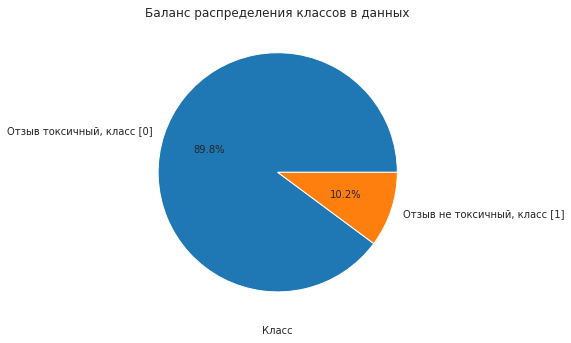

In [9]:
sns.set_style('darkgrid')
data['toxic'].value_counts(normalize=True).plot(kind='pie',figsize=[5.5,5.5], legend=False, autopct='%1.1f%%',labels=['Отзыв токсичный, класс [0]','Отзыв не токсичный, класс [1]'])
plt.title('Баланс распределения классов в данных')
plt.xlabel('Класс')
plt.ylabel('')
plt.show()

### Подготовим текст

In [10]:
%%time

tqdm.pandas()
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemm_text = " ".join([token.lemma_ for token in doc])
    cleared_text = re.sub(r'[^a-zA-Z]', ' ', lemm_text) 
    return " ".join(cleared_text.split())

data['lemm_text'] = data['text'].progress_apply(lemmatize_text)

data = data.drop(['text'], axis=1)

  0%|          | 0/159292 [00:00<?, ?it/s]

CPU times: user 44min 35s, sys: 15.2 s, total: 44min 50s
Wall time: 45min 57s


In [11]:
data['lemm_text'].sample(10)

152920    resonse to AniMate re Veronika Zemanova articl...
145595    in keep with the Northern Ireland wikipedia pa...
149993    hello Again Lee I already block you several ti...
33029     none of those two book be quote how be I suppo...
118071       thank thank for the barnstar talk contribution
135909           for his good friend cheeeeeze belly Cheeze
57956     please stop if you continue to vandalize page ...
126374    your mother be suck my cock right now you lose...
14179               perhaps he ll avoid those in the future
105067    this smack of label critic as capitalism advoc...
Name: lemm_text, dtype: object

### Проведём частотный анализ текста

In [12]:
text_tokens = (data['lemm_text']).apply(word_tokenize)

In [13]:
data = data.reset_index(drop=True)
text_tokens = text_tokens.reset_index(drop=True)

In [14]:
text_toxic = text_tokens.iloc[data.loc[data['toxic'] == 1].index]
text_non_toxic = text_tokens.iloc[data.loc[data['toxic'] == 0].index]

In [15]:
new_text_tocix = []

for i in text_toxic:
    for g in i:
        new_text_tocix.append(g)

new_text_non_toxic = []

for i in text_non_toxic:
    for g in i:
        new_text_non_toxic.append(g)

In [16]:
fdist_toxic = FreqDist(new_text_tocix)   
fdist_non_toxic = FreqDist(new_text_non_toxic)   

In [17]:
fdist_toxic.most_common(5)

[('be', 42568), ('you', 40187), ('I', 30463), ('the', 23048), ('a', 21969)]

In [18]:
fdist_non_toxic.most_common(5)

[('be', 483080),
 ('the', 472799),
 ('to', 279836),
 ('I', 244817),
 ('of', 211890)]

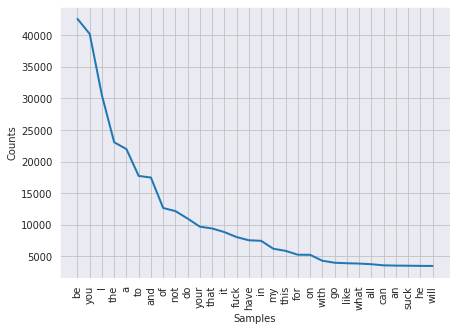

In [19]:
plt.figure(figsize=(7, 5))
fdist_toxic.plot(30, cumulative=False)
plt.show()

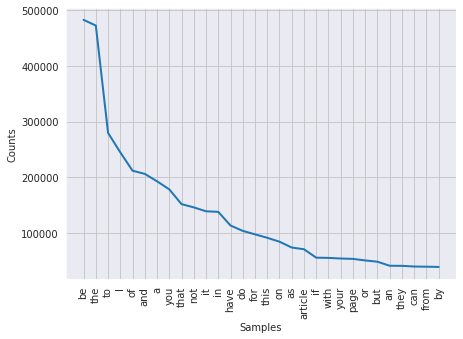

In [20]:
plt.figure(figsize=(7, 5))
fdist_non_toxic.plot(30, cumulative=False)
plt.show()

### Проведём частотный анализ облака слов

In [21]:
text_raw_toxic = " ".join(data.loc[data['toxic'] == 1]['lemm_text'])
text_raw_non_toxic = " ".join(data.loc[data['toxic'] == 0]['lemm_text'])

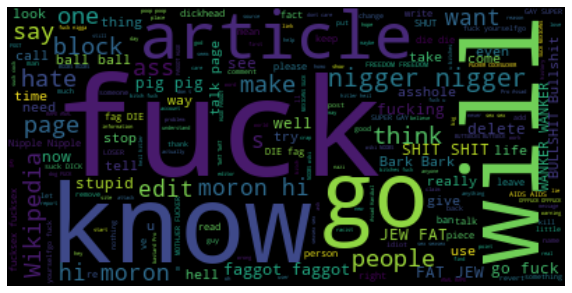

In [22]:
wordcloud_toxic = WordCloud().generate(text_raw_toxic)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

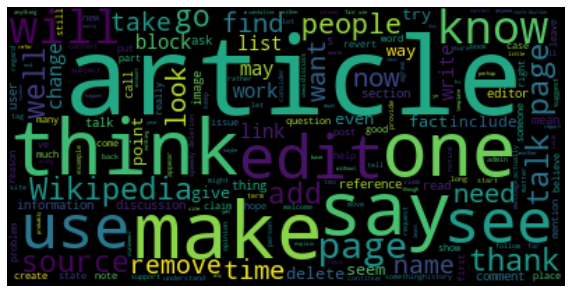

In [23]:
wordcloud_non_toxic = WordCloud().generate(text_raw_non_toxic)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Разделим на выборки

In [24]:
target = data['toxic']
features = data.drop(['toxic'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.25, 
                                                                              random_state=42,
                                                                              shuffle=True,
                                                                              stratify=target
                                                                              )

### Уберём ненужные слова из текста

In [25]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords)

features_train = count_tf_idf.fit_transform(features_train['lemm_text'])
features_test = count_tf_idf.transform(features_test['lemm_text'])

**Вывод**

В ходе преподготовки были получены признаки для обучения и разделена выборка на обучающую и тестовую.

## Обучение

### LogisticRegression

In [28]:
random.seed(42)

In [ ]:
%%time

params = {'model__solver':['newton-cg', 'lbfgs', 'liblinear'],
          'model__C':[0.1, 1, 10],
          'model__class_weight':['balanced', None]}

pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,4))),
    ('tfidf', TfidfTransformer()),
    ('model',LogisticRegression())])

grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params, scoring='f1')
grid.fit(features_train['lemm_text'], target_train)
grid.score(features_test, target_test)

In [ ]:
%%time

class_ratio = data['toxic'].value_counts()[0] / data['toxic'].value_counts()[1]
dict_classes={0:1, 1:class_ratio}

classificator = LogisticRegression()
hyperparams = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.1, 1, 10],
                'class_weight':[dict_classes],
                'random_state':[42]}]


print('# Tuning hyper-parameters for f1_score')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1', cv=3)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
LR_best_params = clf.best_params_
print(LR_best_params)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_LR = max(means)

print(f'Best F1 - {cv_f1_LR}')

In [ ]:
classificator = LogisticRegression()
classificator.set_params(**LR_best_params)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
valid_f1_LR = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_LR)
print('F1 на валидации', valid_f1_LR)

### DecisionTreeClassifier

In [ ]:
%%time

classificator = DecisionTreeClassifier()
hyperparams = [{'max_depth':[x for x in range(50,100,2)],
                'random_state':[42],
                'class_weight':[dict_classes]}]


print('# Tuning hyper-parameters for f1_score')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1',cv=3)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
DTC_best_params = clf.best_params_
print(DTC_best_params)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_DTC = max(means)

print(f'Best F1 - {cv_f1_DTC}')

In [ ]:
classificator = DecisionTreeClassifier()
classificator.set_params(**DTC_best_params)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
valid_f1_DTC = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_DTC)
print('F1 на валидации', valid_f1_DTC)

### SGDClassifier

In [ ]:
%%time

classificator = SGDClassifier()
hyperparams = [{'loss':['hinge', 'log', 'modified_huber'],
                'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                'random_state':[42],
                'class_weight':[dict_classes]}]


print('# Tuning hyper-parameters for f1_score')
print()
clf = GridSearchCV(classificator, hyperparams, scoring='f1',cv=3)
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
SGDC_best_params = clf.best_params_
print(SGDC_best_params)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_SGDC = max(means)

print(f'Best F1 - {cv_f1_SGDC}')

In [ ]:
classificator = SGDClassifier()
classificator.set_params(**SGDC_best_params)
classificator.fit(features_train, target_train)
target_predict = classificator.predict(features_valid)
valid_f1_SGDC = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_SGDC)
print('F1 на валидации', valid_f1_SGDC)

### Создадим таблицу результатов

In [ ]:
index = ['LogisticRegression',
         'DecisionTreeClassifier',
         'SGDClassifier']
data = {'F1 на CV':[cv_f1_LR,
                    cv_f1_DTC,
                    cv_f1_SGDC],
        'F1 на валидации':[valid_f1_LR,
                           valid_f1_DTC,
                           valid_f1_SGDC]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data['Выполнение задачи'] = scores_data['F1 на валидации'] > 0.75
scores_data

**Вывод**

Из данных таблицу видно, что лучшими моделями являются LogisticRegression и SGDClassifier. Их мы и будем использовать на тестовой выборке

## Выводы

### LogisticRegression

In [ ]:
model_lr = LogisticRegression(C=10, class_weight={0: 1, 1: 8.841344371679229}, solver='lbfgs')
model_lr.fit(features_train, target_train)
prediction_lr = model_lr.predict(features_test)
f1_lr = f1_score(target_test, prediction_lr)
print(f'Метрика F1 модели LogisticRegression на тренировочной выборке - {f1_lr}')

### SGDClassifier

In [ ]:
model_sgd = SGDClassifier(class_weight={0: 1, 1: 8.841344371679229}, eta0=0.1, learning_rate='adaptive', loss='modified_huber', random_state=42)
model_sgd.fit(features_train, target_train)
prediction_sgd = model_sgd.predict(features_test)
f1_sgd = f1_score(target_test, prediction_sgd)
print(f'Метрика F1 модели SGDClassifier на тренировочной выборке - {f1_sgd}')

### Вывод

**Вывод**

Было прделано:

- Данные и библиотеки загружены.
- Данные подготовлены.
- Сформированы обучающая, валидационная и тестовая выборка.
- Обучены модели и выбраны лучшии из них на валидационной выборке.
- Лучшии модели протестированны на тестовой выборке

Лучшей моделью оказалась LogisticRegression c показателем F1 - 0.754